# Introduction to Data Preprocessing

Data preprocessing is a crucial step in preparing a dataset for analysis and modeling. This notebook focuses on transforming raw data into a clean and structured format that can be effectively used in predictive models. The primary goals of preprocessing include normalizing data, encoding categorical variables, and preparing the features for the machine learning pipeline.

## Objectives of Preprocessing
  
- **Encoding Categorical Variables**: Convert categorical features into numerical formats using techniques such as one-hot encoding or label encoding.
  
- **Scaling and Normalization**: Apply scaling techniques to standardize features, ensuring that variables with different scales do not skew the model’s results.
  
- **Feature Engineering**: Create new features or modify existing ones to improve model accuracy.

## Importance of Preprocessing

Proper preprocessing ensures that the data is clean, reliable, and structured in a way that machine learning algorithms can interpret and learn from effectively. It also helps to mitigate potential biases, improve model performance, and reduce the risk of overfitting.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler

%run ../census_income/utils/pandas_missing_handler.py
%run ../census_income/utils/pandas_explorer.py

## Data load and first visualization:

In [14]:
path = '../census_income/data/cleaned_data.csv'
df = pd.read_csv(path).drop(columns='Unnamed: 0')
print(df.shape)
df.head()

(30161, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Encoding Nominal Categorical Variables Using One-hot Encoder

In [15]:
# Selecting features to apply OHE
cols_to_encode = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']

# Applying OHE to the selected features
encoded_df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# Changing ohe cols-type of data to int
encoded_df[encoded_df.select_dtypes('bool').columns] = encoded_df.select_dtypes(include='bool').astype(int)
encoded_df

,age,fnlwgt,education,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,50,83311,Bachelors,13,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,HS-grad,9,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,11th,7,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,Bachelors,13,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,Masters,14,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,257302,Assoc-acdm,12,0,0,38,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
30157,40,154374,HS-grad,9,0,0,40,>50K,0,1,...,0,0,0,0,0,0,0,1,0,0
30158,58,151910,HS-grad,9,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
30159,22,201490,HS-grad,9,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


## Encoding Ordinal Categorical Variables Using OrdinalEncoder:

In [16]:
education_levels = [
    ' Preschool',
    ' 1st-4th',
    ' 5th-6th',
    ' 7th-8th',
    ' 9th',
    ' 10th',
    ' 11th',
    ' 12th',
    ' HS-grad',
    ' Some-college',
    ' Assoc-acdm',
    ' Assoc-voc',
    ' Bachelors',
    ' Masters',
    ' Prof-school',
    ' Doctorate'
]
encoder = OrdinalEncoder(categories=[education_levels])
encoded_df['education'] = encoder.fit_transform(df['education'].to_frame())

## Mapping the dependent variable (income) using one hot encoding:

In [17]:
encoded_df = pd.get_dummies(encoded_df, columns=['income'], drop_first=True)
encoded_df['income_ >50K'] = encoded_df['income_ >50K'].astype(int)

## Scaling the numerical values using minmaxscaler:

In [18]:
scaler = MinMaxScaler()
cols_to_scale = [
    'age',
    'fnlwgt',
    'education_num',
    'capital_gain',
    'capital_loss',
    'hours_per_week'
]

encoded_df[cols_to_scale] = scaler.fit_transform(encoded_df[cols_to_scale])

## Mapping the 'capital_gain' and 'capital_loss' columns into a new 'capital_balance' column:

In [19]:
encoded_df['capital_balance'] = encoded_df['capital_gain'] - encoded_df['capital_loss']
encoded_df = encoded_df.drop(columns=['capital_gain','capital_loss'])

## Correlation Analysis

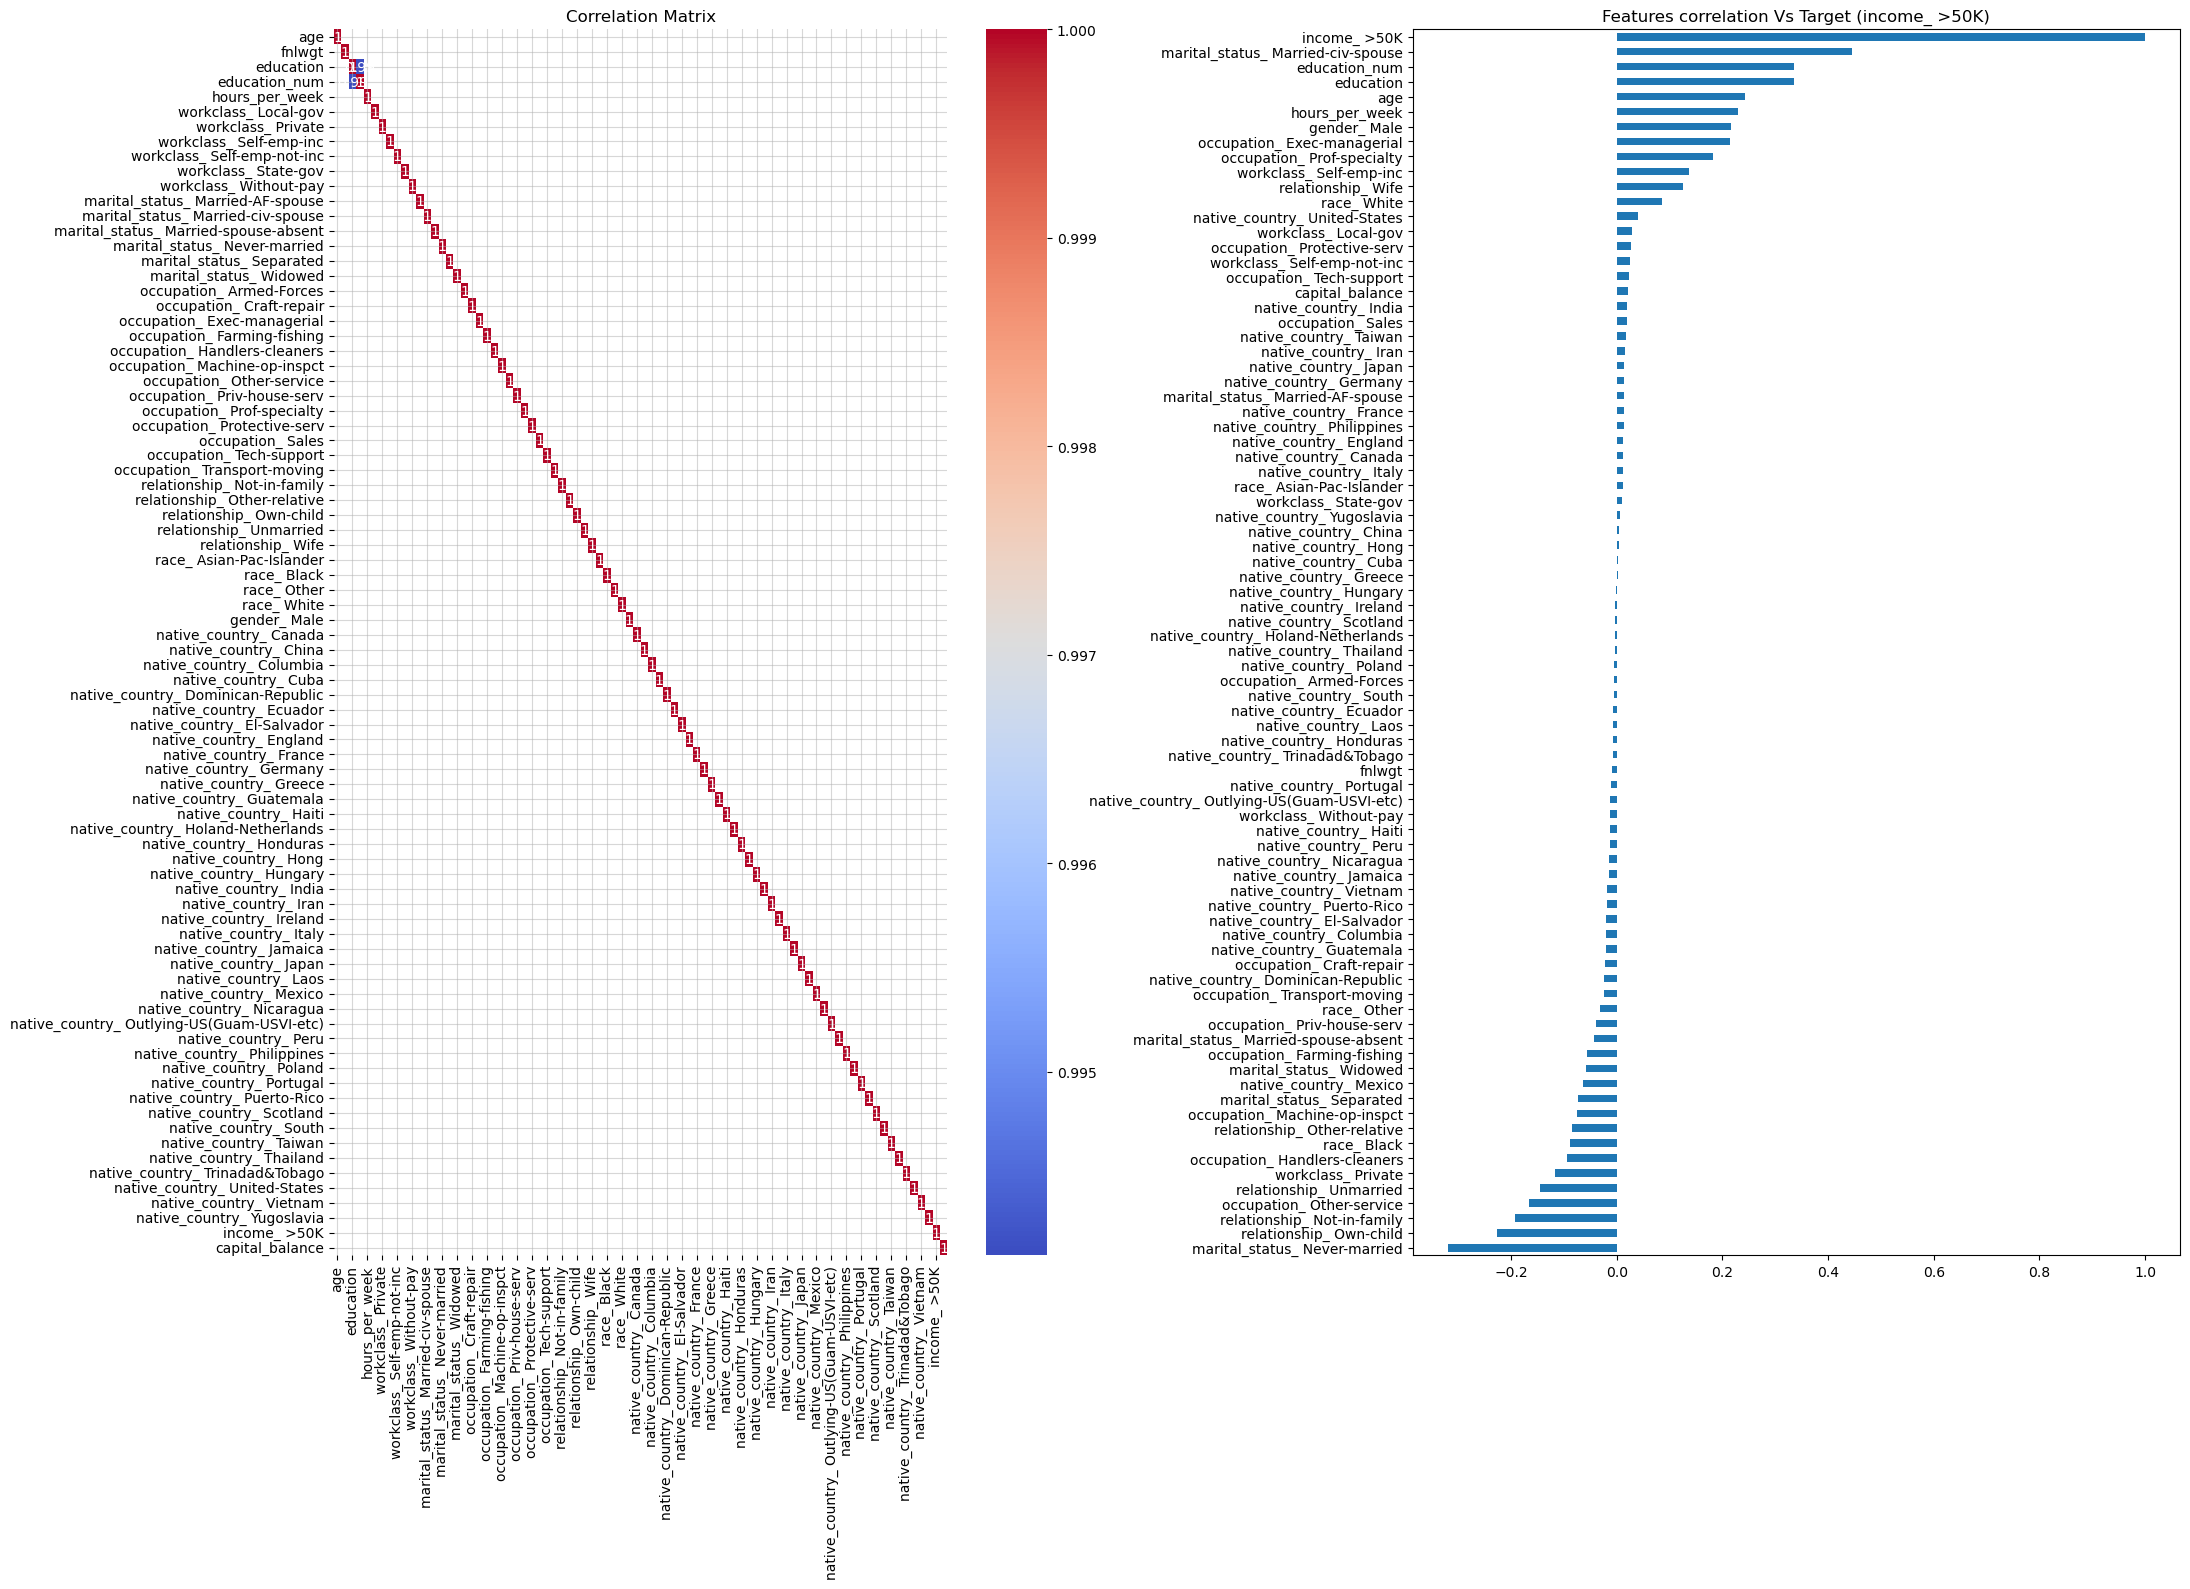

Correlated columns:
{'education', 'education_num'}.
Correlated pairs:
{('education', 'education_num')}


In [20]:
plt.figure(figsize=(22,16))
plt.subplot(1,2,1)
plt.title("Correlation Matrix")
sns.heatmap(encoded_df.corr()[abs(encoded_df.corr())>=0.9], cmap = 'coolwarm', annot=True)
plt.tight_layout()
plt.grid(alpha=0.5)
plt.subplot(1,2,2)
plt.title("Features correlation Vs Target (income_ >50K)")
encoded_df.corr()['income_ >50K'].sort_values(ascending=True).plot(kind='barh')
plt.tight_layout()
plt.show()

def correlation(dataset, threshold):
    col_corr = set()  # Set to store the pairs of correlated columns
    corr_pairs = set() # Set to store the pairs of correlated pairs
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):                # Compare all pairs of columns
            if abs(corr_matrix.iloc[i, j]) >= threshold:                # We are interested in absolute correlation values
                colname1 = corr_matrix.columns[i]                       # Getting the name of the first column
                colname2 = corr_matrix.columns[j]                       # Getting the name of the second column
                
                col_corr.add(colname1)  # Add correlated features to the set
                col_corr.add(colname2)  # Add correlated features to the set
                
                corr_pairs.add(tuple(sorted([colname1, colname2])))     # Add the pair of correlated columns as a tuple
                
    return col_corr, corr_pairs

# Call the function
col_corr, corr_pairs = correlation(encoded_df, 0.9)

# Print the correlated column pairs
print(f"Correlated columns:\n{col_corr}.\nCorrelated pairs:\n{corr_pairs}") 

## Features Selection

### Removing features highly correlated with each other

In [21]:
encoded_df.drop(columns=['education'], inplace=True)

## Mutual Information Analysis, Correlation, Variance, Feature importancies analysis

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# Splitting the dataframe into Features and target
X = encoded_df.drop(columns=['income_ >50K'])
y = encoded_df['income_ >50K']

# Getting the correlation values between features and target
corr_df = abs(encoded_df.corr()['income_ >50K']).drop(columns=['income_ >50K']).to_frame()

# Getting mutual information for classification
mi_scores = mutual_info_classif(X,y, random_state=42)

# Creating a df with the MI scores
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Information': mi_scores
})

# Calculate variances
var_df = encoded_df.var().to_frame().rename(columns={0:'Variance'})
var_df['Feature'] = var_df.index 

# Renaming columns
corr_df = corr_df.rename(columns={'income_ >50K': 'Correlation'})
corr_df['Feature'] = corr_df.index  # Turning index into a column

# Fitting the model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)

# Getting feature importancies
importances = rfc.feature_importances_

# Asociating importancies to the feature names
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sorting features by importancies
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Merging both dataframes using the features column
merged_df = pd.merge(mi_df, corr_df, on='Feature', how='inner')
merged_df = pd.merge(merged_df, var_df, on='Feature', how='inner')
merged_df = pd.merge(merged_df, feature_importances, on='Feature', how='inner')

# Scaling scores
scarler = MinMaxScaler()
cols = ['Mutual_Information','Correlation','Variance','Importance']
merged_df[cols] = scarler.fit_transform(merged_df[cols])

# Creating the Average_Score column
merged_df['Average_Score'] = (merged_df['Mutual_Information'] + merged_df['Correlation'] + merged_df['Variance'] + merged_df['Importance']) / 4
merged_df = merged_df.sort_values('Average_Score',ascending=False).reset_index(drop=True)
merged_df.head(25)

,Feature,Mutual_Information,Correlation,Variance,Importance,Average_Score
0,marital_status_ Married-civ-spouse,0.913009,1.000000,1.000000,0.508697,0.855426
1,marital_status_ Never-married,0.547597,0.717975,0.877849,0.177436,0.580214
2,age,0.552804,0.542426,0.129969,0.906054,0.532813
3,education_num,0.525607,0.752344,0.116003,0.646112,0.510017
4,capital_balance,1.000000,0.043856,0.058312,0.704654,0.451706
5,gender_ Male,0.243741,0.485545,0.880532,0.094909,0.426182
6,relationship_ Not-in-family,0.174926,0.432728,0.765541,0.093690,0.366721
7,hours_per_week,0.323654,0.514261,0.059922,0.500037,0.349469
8,relationship_ Own-child,0.300288,0.506873,0.506820,0.065095,0.344769
9,fnlwgt,0.255079,0.018234,0.020599,1.000000,0.323478


## Saving Preprocessed and feature_scores datasets into csv files

In [23]:
encoded_df.to_csv('../census_income/data/preprocessed_data.csv', index=False)
merged_df.to_csv('../census_income/data/feature_scores.csv', index=False)
print(encoded_df.shape)
encoded_df.head()

(30161, 81)


,age,fnlwgt,education_num,hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K,capital_balance
0,0.452055,0.047277,0.800000,0.122449,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.0
1,0.287671,0.137244,0.533333,0.397959,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
2,0.493151,0.150212,0.400000,0.397959,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
3,0.150685,0.220703,0.800000,0.397959,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0.273973,0.184109,0.866667,0.397959,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0


# Conclusions

The preprocessing stage of this analysis has provided valuable insights and established a solid foundation for the subsequent modeling phase. Key conclusions include:

**Encoding Categorical Variables**:
   - Categorical variables were successfully encoded using `OrdinalEncoder`, `LabelEncoder` and `OneHotEncoder`. 
   - This transformation is essential for enabling machine learning algorithms to interpret categorical data effectively.


**Feature Scaling**:
   - Quantitative variables were scaled using `MinMaxScaler`. This normalization is particularly beneficial for regression models, as it improves convergence and ensures that all features contribute equally to the model performance.

**Creation of New Features**:
   - A new feature, 'capital_balance', was derived from the existing 'capital_gain' and 'capital_loss' columns. This addition aims to capture the net capital impact, providing a potentially valuable predictor for the target variable.

**Prepared Data for Modeling**:
   - The preprocessing steps have prepared the dataset for modeling with various algorithms, including logistic regression, decision trees, and random forests. This ensures that the models can be trained on a clean, well-structured dataset.

In summary, the preprocessing phase has been crucial in transforming the raw data into a structured format suitable for analysis. With these steps completed, the next phase will focus on training and evaluating predictive models to gain insights into income prediction.
